In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

df = pd.read_csv('../data/updated_data.csv')

In [1]:
# Scale data
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df.iloc[:, 1:]), columns=df.columns[1:])
df_scaled['symbol'] = df['symbol']

# log transform everything

cols = list(df_scaled.columns)
cols.pop(-1)

df_scaled.fillna(method='ffill', inplace=True)
df_log = np.log1p(df_scaled[cols] + 1e-6)
df_log.fillna(method='ffill', inplace=True)
df_log.fillna(method='bfill', inplace=True)

NameError: name 'StandardScaler' is not defined

In [ ]:
df.columns

In [ ]:
from sklearn.metrics import silhouette_score

cluster_range = range(2, 40)
silhouette_scores = []
wcss_scores = []

for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(df_log[cols])
    score = silhouette_score(df_log[cols], cluster_labels)
    silhouette_scores.append(score)
    wcss_scores.append(kmeans.inertia_)

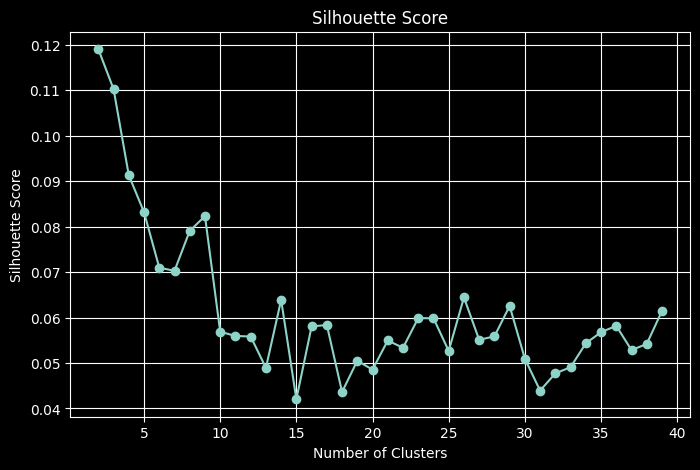

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.title('Silhouette Score')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

In [ ]:
from sklearn.cluster import KMeans

cluster_results = pd.DataFrame({'symbol': df['symbol']})

for k in range(5, 21):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(df_log[cols])
    cluster_results[f'k={k}'] = cluster_labels

In [ ]:
from sklearn.manifold import TSNE

# visualize 5<k<20 T-SNE

for k in range(5, 20):
    tsne = TSNE(n_components=2, random_state=42, perplexity=30)
    df_tsne = tsne.fit_transform(df_log[cols])

    pypl_index = df_scaled[df_scaled['symbol'] == 'PYPL'].index[0]
    pypl_coordinates = df_tsne[pypl_index]

    # Plot the T-SNE reduced data with clusters
    plt.figure(figsize=(8, 6))
    plt.scatter(df_tsne[:, 0], df_tsne[:, 1], c=cluster_results[f'k={k}'], cmap='tab20', s=k)
    plt.scatter(pypl_coordinates[0], pypl_coordinates[1], color='#f17fc5', marker='x', s=200, label='PYPL')
    plt.title(f'T-SNE Visualization of Clusters (k={k})')
    plt.xlabel('T-SNE Component 1')
    plt.ylabel('T-SNE Component 2')
    plt.colorbar(label='Cluster')
    plt.grid(True)
    plt.legend()
    plt.show()

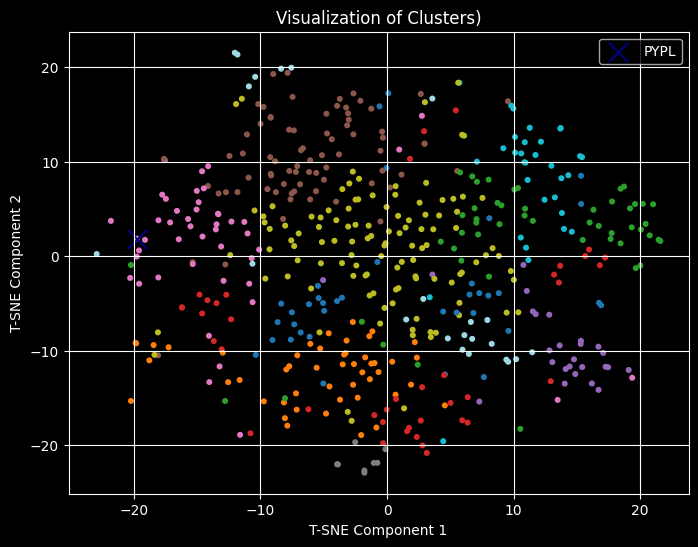

In [ ]:
import matplotlib.pyplot as plt

k=11

tsne = TSNE(n_components=2, random_state=42, perplexity=30)
df_tsne = tsne.fit_transform(df_log[cols])

pypl_index = df_scaled[df_scaled['symbol'] == 'PYPL'].index[0]
pypl_coordinates = df_tsne[pypl_index]

plt.figure(figsize=(8, 6))
plt.scatter(df_tsne[:, 0], df_tsne[:, 1], c=cluster_results[f'k={k}'], cmap='tab20', s=k)
plt.scatter(pypl_coordinates[0], pypl_coordinates[1], color='navy', marker='x', s=200, label='PYPL')
plt.title(f'Visualization of Clusters)')
plt.xlabel('T-SNE Component 1')
plt.ylabel('T-SNE Component 2')
plt.grid(True)
plt.legend()

plt.savefig('tsne_clusters.png')
plt.show()


In [ ]:
clusters = {}
for cluster_id in range(11):
    clusters[cluster_id] = cluster_results.loc[cluster_results['k=11'] == cluster_id, 'symbol'].tolist()

pypl_cluster = clusters[6]

for cluster_id, stocks in clusters.items():
    print(f"Cluster {cluster_id}: {stocks}")

Cluster 0: ['HUBB', 'VLTO', 'FICO', 'BG', 'PODD', 'CPT', 'DAY', 'GNRC', 'MPWR', 'IEX', 'WAB', 'FTNT', 'IDXX', 'UDR', 'O', 'EQIX', 'ALLE', 'AME', 'XYL', 'TEL', 'KMX', 'OKE', 'VTR', 'WYNN', 'FAST', 'AVB', 'PSA', 'CTAS', 'A', 'MAR', 'CINF', 'AMAT', 'BSX', 'HD', 'DIS', 'CL', 'KMB']
Cluster 1: ['LII', 'BLDR', 'AXON', 'TRGP', 'MRNA', 'PTC', 'TER', 'ODFL', 'NVR', 'CDW', 'CPRT', 'BR', 'AMD', 'HPE', 'AVGO', 'PNR', 'FCX', 'MPC', 'CMG', 'TT', 'ROP', 'IRM', 'RSG', 'CF', 'MCHP', 'LEN', 'DHI', 'GILD', 'NVDA', 'TXN', 'NI', 'ADI', 'QCOM', 'NTAP', 'AFL', 'DHR', 'MCO', 'AZO', 'GLW', 'MSFT', 'RVTY', 'PHM', 'GWW', 'CAT', 'COP', 'ETR', 'GE', 'MRK', 'SO']
Cluster 2: ['WDAY', 'GDDY', 'ABNB', 'ACGL', 'CZR', 'LYV', 'NOW', 'LVS', 'MSCI', 'RMD', 'BKR', 'SRE', 'SNPS', 'CBOE', 'MTD', 'GPN', 'UAL', 'KHC', 'MLM', 'ZTS', 'APTV', 'KMI', 'EW', 'FFIV', 'ROST', 'V', 'WELL', 'HST', 'AMZN', 'EA', 'PPL', 'ZBH', 'FI', 'SYK', 'EOG', 'AES', 'PAYX', 'WM', 'PGR', 'ALL', 'SYY', 'PH', 'DOV', 'TJX', 'APD', 'MAS', 'NEE', 'SHW', 'ABT

Compare PYPL to other stocks in cluster

In [ ]:
price = pd.read_csv('/Users/parkercarrus/Documents/Algory.nosync/Cluster3/Algory_Cluster/data/sp_price_data.csv')

In [ ]:
# calculate PYPL correlation with cluster

cluster_correlations = {}

for cluster_id, stocks in clusters.items():
    cluster_prices = price[price['symbol'].isin(stocks)]
    pivot_prices = cluster_prices.pivot(index='date', columns='symbol', values='close')
    correlation_matrix = pivot_prices.corr()
    cluster_correlations[cluster_id] = correlation_matrix

print(f"PYPL correlation with cluster {cluster_correlations[6]['PYPL'].mean()}")

PYPL correlation with cluster 0.11675352655236705


In [ ]:
# calculate PYPL correlation with entire S&P
grouped_close = price.groupby('symbol')['close'].apply(list)
correlation_matrix = grouped_close.apply(pd.Series).transpose().corr()
print(f"PYPL mean correlation with SP {correlation_matrix['PYPL'].mean()}")

PYPL mean correlation with SP -0.025088748210791104


In [ ]:
# filter and clean price data
pypl_cluster_prices = price[price['symbol'].isin(pypl_cluster)]
cluster_pivoted = pypl_cluster_prices.pivot(index='date', columns='symbol', values='close')

# normalize price by dividing by initial price
cluster_pivoted_normalized = cluster_pivoted / cluster_pivoted.iloc[0]

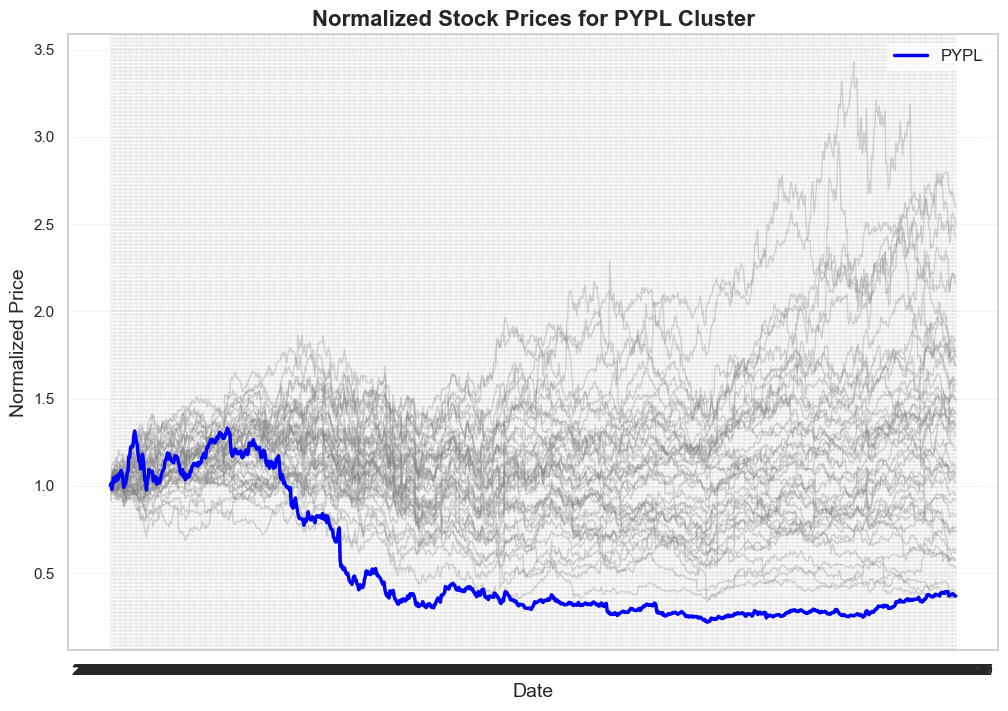

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a clean white background style
sns.set(style="whitegrid")

plt.figure(figsize=(12, 8))
for stock in cluster_pivoted_normalized.columns:
    if stock == 'PYPL':
        plt.plot(cluster_pivoted_normalized.index, cluster_pivoted_normalized[stock], label='PYPL', color='blue', linewidth=2.5, zorder=5)
    else:
        plt.plot(cluster_pivoted_normalized.index, cluster_pivoted_normalized[stock], color='grey', alpha=0.3, linewidth=1)

# Add titles and labels with a modern look
plt.title('Normalized Stock Prices for PYPL Cluster', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=14, fontweight='regular')
plt.ylabel('Normalized Price', fontsize=14, fontweight='regular')

# Add legend for PYPL only, improve location and style
plt.legend(loc='best', fontsize=12, frameon=True, framealpha=0.7, facecolor='white', edgecolor='none')

# Customize grid to be less pronounced
plt.grid(visible=True, linestyle='--', alpha=0.5, linewidth=0.5)

# Show the plot
plt.savefig('normalized_stock_prices.png', dpi=300, bbox_inches='tight')
plt.show()


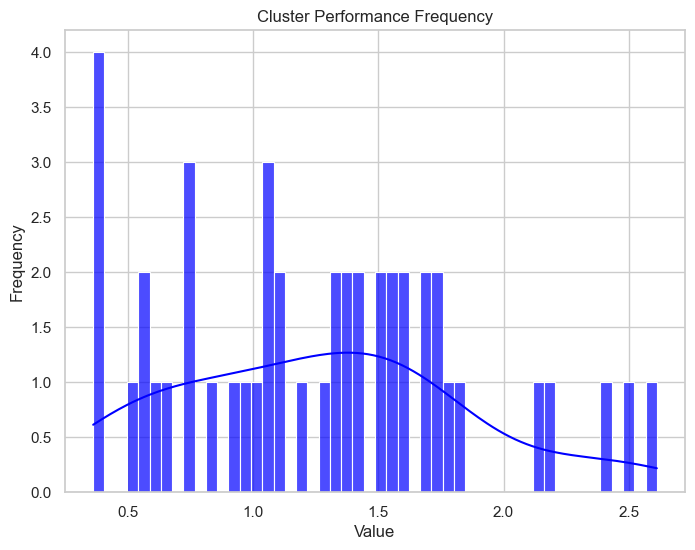

In [ ]:
import seaborn as sns

d = cluster_pivoted_normalized.tail(1).values

plt.figure(figsize=(8, 6))
sns.histplot(d.flatten(), bins=50, kde=True, color='blue', alpha=0.7)
plt.title('Cluster Performance Frequency')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.savefig('clusterperformancefrequency.png')
plt.show()

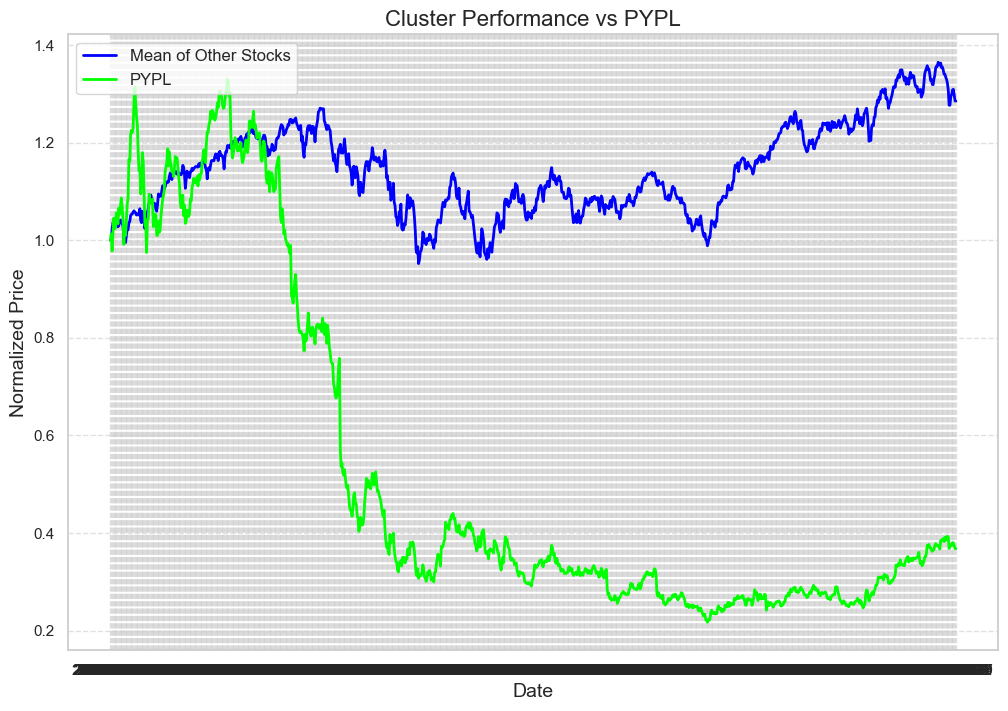

In [ ]:
import seaborn as sns

# Set a clean white background style
sns.set_theme(style="whitegrid")

# Calculate mean of other stocks
other_stocks = [stock for stock in pypl_cluster if stock != "PYPL"]
mean_other_stocks = cluster_pivoted_normalized[other_stocks].mean(axis=1)

# Plot the data
plt.figure(figsize=(12, 8))
plt.plot(cluster_pivoted_normalized.index, mean_other_stocks, label='Mean of Other Stocks', color='blue', linewidth=2)
plt.plot(cluster_pivoted_normalized.index, cluster_pivoted_normalized['PYPL'], label='PYPL', color='lime', linewidth=2)

# Add titles and labels
plt.title('Cluster Performance vs PYPL', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Normalized Price', fontsize=14)

# Add legend and grid
plt.legend(loc='upper left', fontsize='medium')
plt.grid(visible=True, linestyle='--', alpha=0.6)

# Show the plot
plt.show()
# Export the data to a CSV file
export_data = pd.DataFrame({
    'Date': cluster_pivoted_normalized.index,
    'Mean of Other Stocks': mean_other_stocks,
    'PYPL': cluster_pivoted_normalized['PYPL']
})
export_data.to_csv('cluster_performance_vs_pypl.csv', index=False)

In [ ]:
import pandas as pd

def check_stock_performance(stock_series, cluster_series, N, J, E):
    """
    Check if the stock drops below the cluster performance by N percent at the latest J percent of the time series,
    and if it subsequently returns to within E percent of the cluster mean at any point.
    """
    # Calculate the index from which to start the analysis
    latest_index = int(len(stock_series) * (1 - J / 100))
    stock_latest = stock_series.iloc[latest_index:]
    cluster_latest = cluster_series.iloc[latest_index:]

    # Ensure there's enough data to perform the check
    if len(stock_latest) == 0 or len(cluster_latest) == 0:
        return False

    # Compute drop threshold
    drop_threshold = cluster_latest * (1 - N / 100)
    dropped_below_threshold = stock_latest < drop_threshold

    # Check if the stock ever comes back near the cluster mean after dropping below threshold
    if dropped_below_threshold.any():
        after_drop_index = dropped_below_threshold[dropped_below_threshold].index[0]
        stock_after_drop = stock_series[after_drop_index:]
        cluster_after_drop = cluster_series[after_drop_index:]
        return_range_lower = cluster_after_drop * (1 - E / 100)
        return_range_upper = cluster_after_drop * (1 + E / 100)
        
        # Check if stock returns to within the range at any point after the drop
        return ((stock_after_drop >= return_range_lower) & (stock_after_drop <= return_range_upper)).any()
    
    return False

def calculate_rebound_metric(dataframe, cluster_mean_series, N, J, E):
    """
    Calculate the percentage of stocks that, after falling below the cluster mean by N percent,
    rebound to within E percent of it at any point thereafter.
    """
    results = []
    fall_below_count = 0  # To track how many stocks fall below the threshold

    for stock in dataframe.columns:
        stock_series = dataframe[stock]
        result = check_stock_performance(stock_series, cluster_mean_series, N, J, E)
        if result is not None:  # Check if stock_series went below the threshold
            fall_below_count += 1
            if result:
                results.append(result)
    
    # Calculate the percentage of stocks that meet the rebound condition among those that fell below the threshold
    if fall_below_count > 0:
        rebound_percentage = sum(results) / fall_below_count * 100
    else:
        rebound_percentage = 0  # Avoid division by zero if no stocks fell below the threshold
    print(fall_below_count)
    return rebound_percentage

rebound_percentage = calculate_rebound_metric(cluster_pivoted_normalized[other_stocks], mean_other_stocks, 15, 100, 2)
print(f"Percentage of stocks that revert to the mean after falling below: {rebound_percentage}%")


45
Percentage of stocks that revert to the mean after falling below: 48.888888888888886%


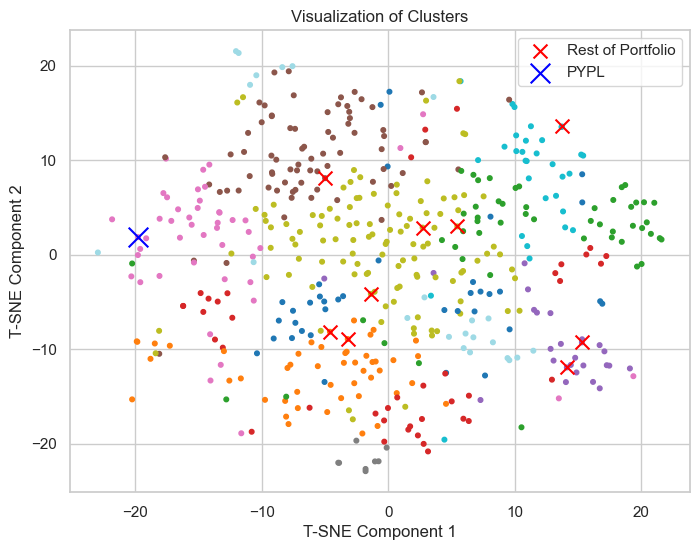

In [ ]:
from sklearn.manifold import TSNE

# Apply T-SNE to reduce dimensions to 2 for visualization
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
df_tsne = tsne.fit_transform(df_log[cols])

portfolio = ["MSFT", "JPM", "META", "NVDA", "LLY", 
             "DBRG", "UNH", "SVNDY", "SNOW", "ESEA", 
             "LGND", "APO", "SE", "URI", "PLTR"]

ticker = 'PYPL'

# Filter the dataframe to include only the portfolio stocks
df_filtered = df_scaled[df_scaled['symbol'].isin(portfolio)]
highlight_indices = df_filtered.index.to_list()
highlight_x = df_tsne[highlight_indices, 0]
highlight_y = df_tsne[highlight_indices, 1]

highlight_ticker = df_scaled[df_scaled['symbol'] == ticker].index
highlight_x_ticker = df_tsne[highlight_ticker, 0]
highlight_y_ticker = df_tsne[highlight_ticker, 1]

# Plot the T-SNE reduced data with clusters
plt.figure(figsize=(8, 6))
plt.scatter(df_tsne[:, 0], df_tsne[:, 1], c=cluster_results['k=11'], cmap='tab20', s=11)

# Plot the highlighted stocks with 'X' markers
plt.title('Visualization of Clusters')
plt.xlabel('T-SNE Component 1')
plt.scatter(highlight_x, highlight_y, color='red', marker='x', s=100, label='Rest of Portfolio')
plt.scatter(highlight_x_ticker, highlight_y_ticker, color='blue', marker='x', s=200, label='PYPL')
plt.ylabel('T-SNE Component 2')
plt.grid(True)
plt.legend()
plt.savefig('portfolio.png')
plt.show()

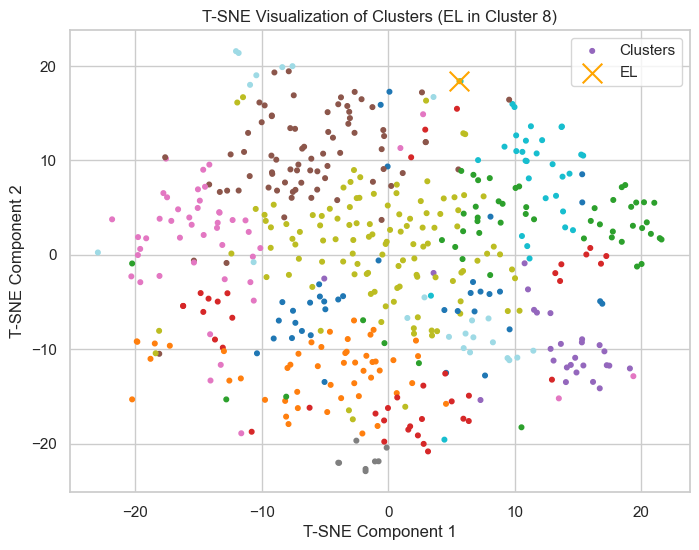

In [ ]:
# Find the cluster for EL
el_index = df_scaled[df_scaled['symbol'] == 'EL'].index[0]
el_cluster = cluster_results.loc[el_index, 'k=11']

# Get T-SNE coordinates for EL
el_coordinates = df_tsne[el_index]

# Plot the T-SNE visualization with EL highlighted
plt.figure(figsize=(8, 6))
plt.scatter(df_tsne[:, 0], df_tsne[:, 1], c=cluster_results['k=11'], cmap='tab20', s=11, label='Clusters')
plt.scatter(el_coordinates[0], el_coordinates[1], color='orange', marker='x', s=200, label='EL')
plt.title(f'T-SNE Visualization of Clusters (EL in Cluster {el_cluster})')
plt.xlabel('T-SNE Component 1')
plt.ylabel('T-SNE Component 2')
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
# Print the stocks in cluster 8
print(f"Cluster 8: {clusters[8]}")

Cluster 8: ['TPL', 'ERIE', 'PLTR', 'LULU', 'BX', 'PANW', 'GEHC', 'CSGP', 'ON', 'NDSN', 'CEG', 'FDS', 'MTCH', 'TECH', 'NXPI', 'ENPH', 'TSLA', 'WST', 'DPZ', 'CARR', 'TROW', 'ATO', 'TFX', 'JKHY', 'KEYS', 'ROL', 'ANET', 'IQV', 'PKG', 'ANSS', 'HLT', 'RJF', 'INCY', 'HWM', 'COO', 'LNT', 'HOLX', 'AWK', 'FRT', 'SWKS', 'RCL', 'META', 'GM', 'REGN', 'STX', 'LRCX', 'MNST', 'CCI', 'BLK', 'NFLX', 'BRK-B', 'WEC', 'NDAQ', 'APH', 'CRM', 'IVZ', 'CTRA', 'ISRG', 'AKAM', 'CTSH', 'BXP', 'EL', 'VTRS', 'BIIB', 'GEN', 'MKC', 'SPG', 'WAT', 'EQR', 'ROK', 'OMC', 'YUM', 'EFX', 'ADBE', 'AON', 'MU', 'EMN', 'IPG', 'LIN', 'AMGN', 'AEE', 'ADSK', 'K', 'NKE', 'MMC', 'MDT', 'ITW', 'LOW', 'VZ', 'AAPL', 'BF-B', 'SNA', 'PCAR', 'AIG', 'DUK', 'JNJ', 'BDX', 'LLY', 'MCD', 'CLX', 'EMR', 'AEP', 'CMS', 'DE', 'HON', 'HSY', 'IBM', 'KO', 'MO', 'NOC', 'NSC', 'PPG', 'SPGI']


In [ ]:
clusters[8]

['TPL',
 'ERIE',
 'PLTR',
 'LULU',
 'BX',
 'PANW',
 'GEHC',
 'CSGP',
 'ON',
 'NDSN',
 'CEG',
 'FDS',
 'MTCH',
 'TECH',
 'NXPI',
 'ENPH',
 'TSLA',
 'WST',
 'DPZ',
 'CARR',
 'TROW',
 'ATO',
 'TFX',
 'JKHY',
 'KEYS',
 'ROL',
 'ANET',
 'IQV',
 'PKG',
 'ANSS',
 'HLT',
 'RJF',
 'INCY',
 'HWM',
 'COO',
 'LNT',
 'HOLX',
 'AWK',
 'FRT',
 'SWKS',
 'RCL',
 'META',
 'GM',
 'REGN',
 'STX',
 'LRCX',
 'MNST',
 'CCI',
 'BLK',
 'NFLX',
 'BRK-B',
 'WEC',
 'NDAQ',
 'APH',
 'CRM',
 'IVZ',
 'CTRA',
 'ISRG',
 'AKAM',
 'CTSH',
 'BXP',
 'EL',
 'VTRS',
 'BIIB',
 'GEN',
 'MKC',
 'SPG',
 'WAT',
 'EQR',
 'ROK',
 'OMC',
 'YUM',
 'EFX',
 'ADBE',
 'AON',
 'MU',
 'EMN',
 'IPG',
 'LIN',
 'AMGN',
 'AEE',
 'ADSK',
 'K',
 'NKE',
 'MMC',
 'MDT',
 'ITW',
 'LOW',
 'VZ',
 'AAPL',
 'BF-B',
 'SNA',
 'PCAR',
 'AIG',
 'DUK',
 'JNJ',
 'BDX',
 'LLY',
 'MCD',
 'CLX',
 'EMR',
 'AEP',
 'CMS',
 'DE',
 'HON',
 'HSY',
 'IBM',
 'KO',
 'MO',
 'NOC',
 'NSC',
 'PPG',
 'SPGI']